## $$Obtención\:Magnitud\:y\:Fase\:de\:una\:FFT$$ ##

* Vamos a representar la señal en tiempo discreto.
* Extraeremos su FFT.
* Extraremos información de la fase y magnitud.
* Reconstruiremos la señal en el dominio del tiempo a partir del dominio de la frecuencia.

### $1-Representación\:tiempo\:discreto$ ###
vamos a considerar la función: 
$$x(t)=0.5\cos(2\pi 10t+\frac{\pi}{6})$$
Donde:
$f_c=10Hz$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft, fftshift, fftfreq, ifftshift
from IPython.display import Image
from scipy import signal

In [2]:
%matplotlib notebook

<IPython.core.display.Javascript object>


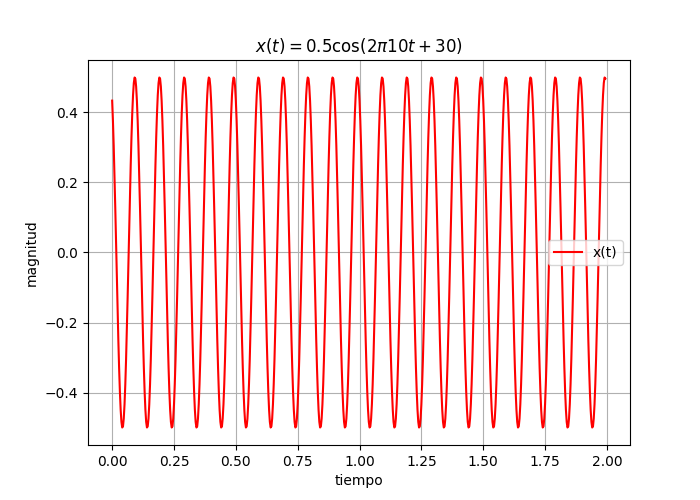

In [3]:
fc=10 #frecuencia de la señal.
fs=32*fc #frecuencia de muestreo
tiempo=np.arange(0,2-1/fs,1/fs) #eje tiempo con muestreo
phase=np.pi/6

plt.figure(figsize=(7,5))
señal=0.5*np.cos(2*np.pi*tiempo*fc+phase)
plt.plot(tiempo, señal,'r', label='x(t)')
plt.xlabel('tiempo')
plt.ylabel('magnitud')
plt.title('$x(t)=0.5\cos(2\pi 10t+30)$')
plt.legend()
plt.grid()
plt.show()

### $2-Representacion\:en\:el\:Dominio\:de\:la\:Frecuencia$ ###
La longitud de transformación N escogido para la FFT debe cubrir la señal de interes. Por ejemplo Las muestras tomadas en el dominio del tiempo si $f_c=10Hz\:y\: f_s=32f_c$, las **$muestra=(f_s)(t_f)$** .    

  donde $t_f:tiempo\:de\:duración$ entonces el escogido deberá ser menor **$(N<muestras)$** 

<IPython.core.display.Javascript object>


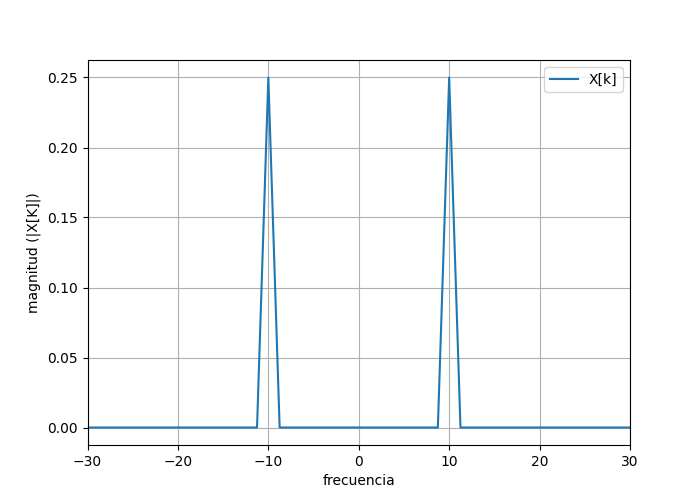

In [5]:
N=256
X=fft(señal,N)
X=fftshift(X)*(1/N) #puntos del complejo DFT.

eje_frec=fftfreq(N,1/fs)
eje_frec=fftshift(eje_frec)

plt.figure(figsize=(7,5))
plt.plot(eje_frec,abs(X), label='X[k]')
plt.xlabel('frecuencia')
plt.ylabel('magnitud (|X[K]|)')
plt.xlim(-3*fc,3*fc)
plt.grid()
plt.legend()
plt.show()

### $3-Fase\:del\:Espectro$ ###
Los componentes espectrales se calculan asi:  
$$\angle X[K]=\tan^{-1}(\frac{X_{im}}{X_{re}})$$  
Donde:  
El intervalo del ángulo es $[-\pi, \pi]$

<IPython.core.display.Javascript object>


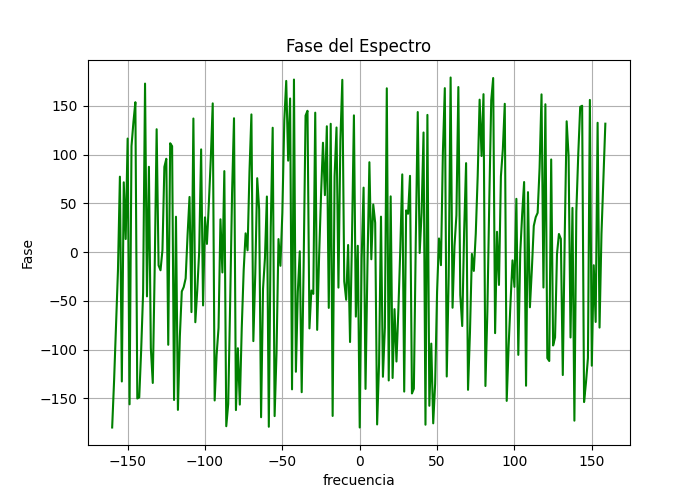

In [6]:
phase=np.angle(N*X, deg=True) #la fase del espectro
plt.figure(figsize=(7,5))
plt.plot(eje_frec,phase, color='g')
plt.xlabel('frecuencia')
plt.ylabel('Fase')
plt.grid()
plt.title('Fase del Espectro')
plt.show()

Una forma más exacta de solo extraer la fase del espectro de la FFF.  
**La solución es definir un umbral de tolerancia e ignorar todos los valores de fase calculados que están por debajo del
umbral.**

<IPython.core.display.Javascript object>


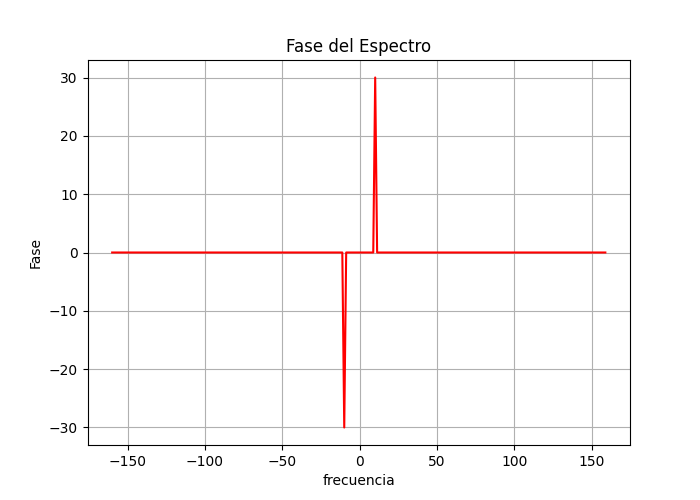

In [7]:
X2=X
tolerancia=max(abs(X))/10000 #tolerancia
X2[abs(X)<tolerancia]=0 #los valores que deseamos
phase_nue=np.angle(X2, deg=True)
plt.figure(figsize=(7,5))
plt.plot(eje_frec,phase_nue, color='r')
plt.xlabel('frecuencia')
plt.ylabel('Fase')
plt.grid()
plt.title('Fase del Espectro')
plt.show()

### $Reconstrucioón\:de\:la\:Senal\:en\:el\:Dominio\:del\:Tiempo$ ###
La reconstrucción de la señal se debe considerar la misma cantidad de puntos usados en la FFT.  
las **$muestra=(f_s)(t_f)$** .    

donde $t_f:tiempo\:de\:duración$, entonces el escogido deberá ser menor **$muestra=N$** 

<IPython.core.display.Javascript object>


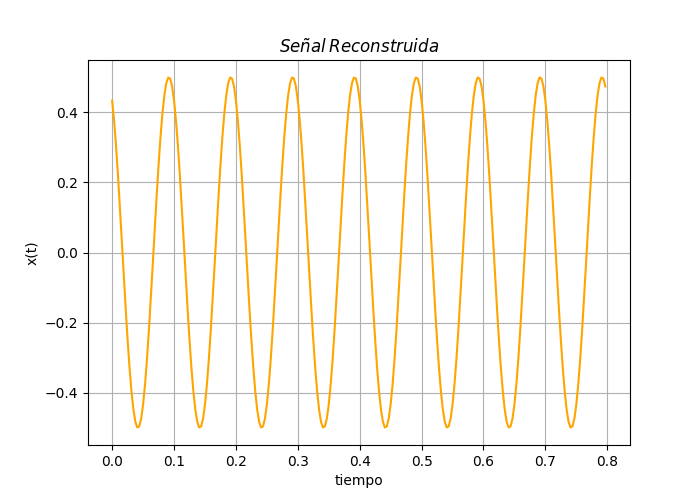

c:\users\antony\appdata\local\programs\python\python38\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [8]:
señal_recons=N*ifft(ifftshift(X),N) #Señal reconstruida
t=np.arange(0,len(señal_recons))/fs #Definiendo el intervalo del tiempo
plt.figure(figsize=(7,5))
plt.plot(t, señal_recons, color='orange')
plt.xlabel('tiempo')
plt.ylabel('x(t)')
plt.title('$Señal\:Reconstruida$')
plt.grid()
plt.show()

## $$Densidad\:Espectral\:de\:Potencia\:(PSD)$$ ##
Existen 2 maneras de calcular el PSD de una señal:
![Image](Imagenes/PSD.PNG)

**Para una señal estocástica, se utilizará el teorema de Wiener-Khinchin.   El teorema estable que un proceso estacionario en sentido amplio, se puede calcular como la transformada de Fourier de la autocorrelación.**

$$R_{xx}(\tau)=E(X(t)X(t-\tau))=\int_{-\infty}^{\infty}x(t)x(t+\tau)dt$$
$$S_{xx}(f)=F[R_{xx}(\tau)]=\int_{-\infty}^{\infty}R_{xx}(\tau)e^{-j2\pi f\tau}d\tau$$
![Image](Imagenes/potencia.PNG)

<IPython.core.display.Javascript object>


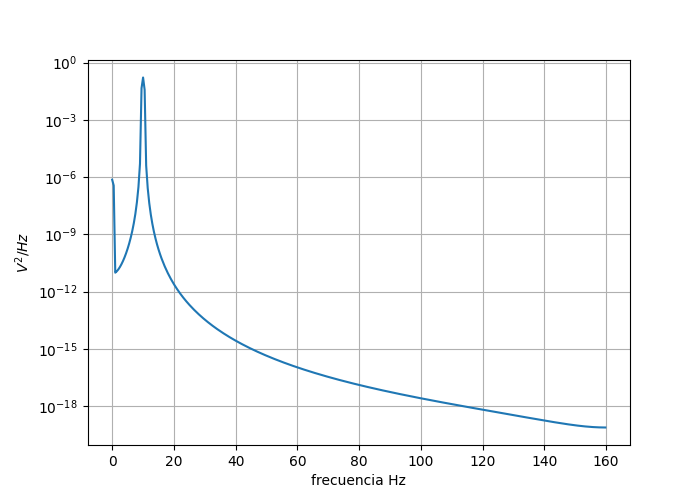

c:\users\antony\appdata\local\programs\python\python38\lib\site-packages\scipy\signal\spectral.py:1961: UserWarning: nperseg = 1024 is greater than input length  = 639, using nperseg = 639
  warnings.warn('nperseg = {0:d} is greater than input length '


In [9]:

fc=10 #frecuencia de la señal.
fs=32*fc #frecuencia de muestreo
tiempo=np.arange(0,2-1/fs,1/fs) #eje tiempo con muestreo
phase=np.pi/6

plt.figure(figsize=(7,5))
señal=0.5*np.cos(2*np.pi*tiempo*fc+phase)
f, Pxx= signal.welch(señal, fs, nperseg=1024)
plt.semilogy(f, Pxx)
plt.xlabel('frecuencia Hz')
plt.ylabel('$V^2/Hz$')
plt.grid()
plt.show()

## $Potencia\:y\:Energía\:de\:una\:Señal$ ##
En procesamiento de señales, es importante conocer el tamaño de la señal utilizada en una determinada aplicación.
La energría de una señal compleja en tiempo continuo se define como:  
$$E_x=\int_{-\infty}^{\infty}|x(t)|^2 dt$$

En procesamiento de señales, esta ecuación indica la fuerza de la señal. En otros casos se asocia con una energía física, como el caso de una señal electrica que será la **energía total** disipada en una resistencia de 1 ohmio.

### $1-Poder\:de\:una\:Señal$ ###
Para tiempos discretos, la potencia se calcula tomando las potencias instantánea de la señal durante un intervalo de tiempo específico, de la siguiente manera:  
* Tome muestras instantánea durante un período de tiempo finito.
* Calcule la energía de la señal.
* Divida por la cantidad de muestras tomadas. (N)
* Tienda el límite del número de muestras hasta el infinito.  
Eso nos dará la potencia total de la señal.

$$P_x=\lim\limits_{N\to\infty}\frac{1}{2N+1}\sum_{n=-N}^{n=+N}|x[n]|^2$$

$1.1-Clasificación\:de\:Señales$
* Señal de Energía: Tiene energía finita.
* Señal de potencia: Tiene potencia finita y diferente de 0.
* Señal sin potencia ni energía: potencia y energía infinita.

### $Cálculos\:de\:Potencia\:de\:una\:Señal(Dominio\:Discreto)$ ###
$$P_x=\lim\limits_{N\to\infty}\frac{1}{N}\sum_{n=0}^{n=N-1}|x[n]|^2$$
Para el caso de una señal:  
$$x(t)=A\sin(2\pi f_ct)$$
$$X(f)=\frac{A}{2j}[\delta(f-f_c)-\delta(f+f_c)]$$
![Image](Imagenes/potencia_1.PNG)

La potencia total viene hacer la suma de $\frac{A^2}{4}+\frac{A^2}{4}=\frac{A^2}{2}$  
Una manera de poder hallar la potencia de la señal, se puede realizar usando la función normal de frobenius.
$$NORM(v,p)=(\sum_{n=0}^{n=N-1}|x[v]|^p)^{\frac{1}{p}}$$
pero por defecto la norma de Frobenius viene dado por:
$$NORM(v,2)=(\sum_{n=0}^{n=N-1}|x[v]|^2)^{\frac{1}{2}}$$

### $Potencia\:Total\:en\:el\:Dominio\:de\:la\:Frecuencia$ ###
La aplicación del apotencia total se verifica aplicando la transformada Discreta de Fourier (DFT), representando en el dominio de la frecuencia utilizamos FFT. Donde el cálculo se realiza de la siguiente manera:
$$P_x[f]=X[f]X^*[f]$$
Donde:  
$X^*[f]=el\:conjugado\:de\:X[f]$

<IPython.core.display.Javascript object>


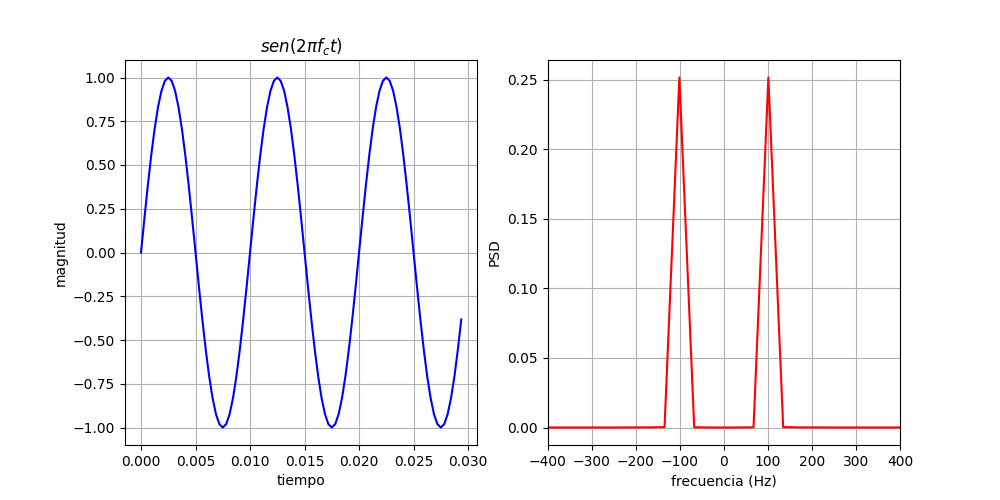

La potencia total: 0.5048625238553226 Watt


c:\users\antony\appdata\local\programs\python\python38\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [10]:
fc=100 #frecuencia de la señal
fs=32*fc #frecuencia de muestreo
ciclos=3 #ciclos a mostrar
t=np.arange(0,ciclos/fc-1/fs,1/fs)
señal=np.sin(2*np.pi*fc*t) #señal seno

N=len(señal)
pot_total=(np.linalg.norm(señal)**2)/N
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.plot(t, señal, color='b',label='seno')
plt.xlabel('tiempo')
plt.title('$sen(2\pi f_c t)$')
plt.ylabel('magnitud')
plt.grid()

print(f'La potencia total: {pot_total} Watt')
fourier=fft(señal,N)
fourier=fftshift(fourier)
eje_frec=fftfreq(N,1/fs)
eje_frec=fftshift(eje_frec)

Px=fourier*np.conjugate(fourier)/(N**2)
plt.subplot(1,2,2)
plt.plot(eje_frec, Px, color='r')
plt.xlabel('frecuencia (Hz)')
plt.ylabel('PSD')
plt.xlim(-4*fc,4*fc)
plt.grid()
plt.show()